In [1]:
import sqlite3

# Connect to the SQLite database file
conn = sqlite3.connect('Database.db')
# Replace ‘Database.db' with the path to your .db file if the file is in another directory.

# Create a cursor object
cursor = conn.cursor()

# Query to retrieve table names
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")

# Fetch all table names
tables = cursor.fetchall()

# Print the table names
for table in tables:
    print(table[0])

# Close the connection
conn.close()


Electric_cars
Fraud_detection
Heart_disease
Insurance_Prediction
TripAdviser_Reviews
Ecommerce_data
Automobile_data
Supermarket_data


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# age: Age of the individual.
# gender: Gender of the individual (male/female).
# bmi: Body Mass Index (BMI) of the individual.
# children: Number of children the individual has.
# smoker: Whether the individual is a smoker (yes/no).
# region: Region where the individual resides.
# medical_history: Any specific medical history or condition the individual has.
# family_medical_history: Any family medical history or conditions.
# exercise_frequency: Frequency of exercise by the individual.
# occupation: Type of occupation of the individual.
# coverage_level: Level of health insurance coverage.
# charges: Medical charges or expenses incurred by the individual.

In [4]:
conn = sqlite3.connect('Database.db')
df = pd.read_sql_query('Select * from Insurance_Prediction' , conn)
df 

,age,gender,bmi,children,smoker,region,medical_history,family_medical_history,exercise_frequency,occupation,coverage_level,charges
0,46.0,male,21.45,5.0,yes,southeast,Diabetes,,Never,Blue collar,Premium,20460.307668871566
1,25.0,female,25.38,2.0,yes,northwest,Diabetes,High blood pressure,Occasionally,White collar,Premium,20390.8992176422
2,38.0,male,44.88,2.0,yes,southwest,,High blood pressure,Occasionally,Blue collar,Premium,20204.476301934814
3,25.0,male,19.89,0.0,no,northwest,,Diabetes,Rarely,White collar,Standard,11789.029842697417
4,49.0,male,38.21,3.0,yes,northwest,Diabetes,High blood pressure,Rarely,White collar,Standard,19268.309838159606
...,...,...,...,...,...,...,...,...,...,...,...,...
999995,59.0,male,46.67,2.0,no,northeast,High blood pressure,,Frequently,Student,Basic,11584.134899834857
999996,33.0,male,36.83,2.0,no,northeast,,High blood pressure,Frequently,Unemployed,Basic,9834.871456313933
999997,39.0,male,39.84,0.0,yes,northeast,Heart disease,High blood pressure,Rarely,Blue collar,Standard,22076.63285624022
999998,37.0,female,45.06,4.0,yes,northeast,High blood pressure,Diabetes,Occasionally,Unemployed,Premium,20297.618727674948


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 12 columns):
 #   Column                  Non-Null Count    Dtype 
---  ------                  --------------    ----- 
 0   age                     1000000 non-null  object
 1   gender                  1000000 non-null  object
 2   bmi                     1000000 non-null  object
 3   children                1000000 non-null  object
 4   smoker                  1000000 non-null  object
 5   region                  1000000 non-null  object
 6   medical_history         1000000 non-null  object
 7   family_medical_history  1000000 non-null  object
 8   exercise_frequency      1000000 non-null  object
 9   occupation              1000000 non-null  object
 10  coverage_level          1000000 non-null  object
 11  charges                 1000000 non-null  object
dtypes: object(12)
memory usage: 91.6+ MB


In [6]:
import pandas as pd

# Strip spaces from all string columns
df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

# Ensure numeric columns are numeric
numeric_cols = ["age", "bmi", "children", "charges"]
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors="coerce")

# Ensure categorical columns are properly converted
category_cols = ["gender", "smoker", "region", "medical_history", "family_medical_history", "exercise_frequency", "occupation", "coverage_level"]
for col in category_cols:
    df[col] = df[col].astype("category")

# Identify and log fully missing numeric columns
empty_cols = df[numeric_cols].isnull().all()
print("Fully missing columns:", empty_cols[empty_cols].index.tolist())

# Fill missing values in numeric columns
for col in numeric_cols:
    if df[col].isnull().all():
        print(f"{col} is fully missing. Filling with 0.")
        df[col] = 0  # Fill fully missing columns with 0
    else:
        median_value = df[col].median()
        print(f"Filling {col} with median: {median_value}")
        df[col] = df[col].fillna(median_value)  # Fill partial missing with median

# Handle blanks in categorical columns
medical_cols = ["medical_history", "family_medical_history"]

# Replace blanks with 'No Disease' for medical columns
for col in medical_cols:
    print(f"Replacing blanks in '{col}' with 'No Disease'")

    # Ensure 'No Disease' is added only once
    if "No Disease" not in df[col].cat.categories:
        df[col] = df[col].cat.add_categories("No Disease")

    # Replace empty values
    df[col] = df[col].apply(lambda x: "No Disease" if x == "" else x)

# Replace blanks with the mode for other categorical columns
for col in category_cols:
    if col not in medical_cols:
        mode_value = df[col].mode()[0]
        print(f"Filling missing values in '{col}' with mode: {mode_value}")

        # Ensure mode is added only once
        if mode_value not in df[col].cat.categories:
            df[col] = df[col].cat.add_categories(mode_value)

        # Replace empty values
        df[col] = df[col].apply(lambda x: mode_value if x == "" else x)

# Final check for remaining NaN values
print("Remaining missing values after cleaning:")
print(df.isnull().sum())

# Verify final data types
print("\nData types after cleaning:")
print(df.dtypes)


Fully missing columns: []
Filling age with median: 41.0
Filling bmi with median: 34.0
Filling children with median: 2.0
Filling charges with median: 16622.12797345963
Replacing blanks in 'medical_history' with 'No Disease'
Replacing blanks in 'family_medical_history' with 'No Disease'
Filling missing values in 'gender' with mode: male
Filling missing values in 'smoker' with mode: yes
Filling missing values in 'region' with mode: northeast
Filling missing values in 'exercise_frequency' with mode: Rarely
Filling missing values in 'occupation' with mode: Unemployed
Filling missing values in 'coverage_level' with mode: Basic
Remaining missing values after cleaning:
age                       0
gender                    0
bmi                       0
children                  0
smoker                    0
region                    0
medical_history           0
family_medical_history    0
exercise_frequency        0
occupation                0
coverage_level            0
charges               

In [7]:
print(df["age"].unique())  # Show first 20 unique values
print(df["children"].unique())
print(df["exercise_frequency"].unique())


[46. 25. 38. 49. 55. 64. 53. 40. 22. 21. 45. 56. 24. 36. 32. 30. 65. 35.
 60. 26. 43. 33. 44. 19. 41. 42. 61. 23. 31. 20. 62. 59. 57. 29. 34. 27.
 47. 50. 37. 52. 63. 28. 54. 51. 58. 48. 39. 18.]
[5. 2. 0. 3. 4. 1.]
['Never', 'Occasionally', 'Rarely', 'Frequently']
Categories (4, object): ['Frequently', 'Never', 'Occasionally', 'Rarely']


In [8]:
category_cols

['gender',
 'smoker',
 'region',
 'medical_history',
 'family_medical_history',
 'exercise_frequency',
 'occupation',
 'coverage_level']

In [9]:
numeric_cols

['age', 'bmi', 'children', 'charges']

In [10]:
# To find unique values in each independent variable

for col in df.columns:
  print(df[col].unique(),"\n")

[46. 25. 38. 49. 55. 64. 53. 40. 22. 21. 45. 56. 24. 36. 32. 30. 65. 35.
 60. 26. 43. 33. 44. 19. 41. 42. 61. 23. 31. 20. 62. 59. 57. 29. 34. 27.
 47. 50. 37. 52. 63. 28. 54. 51. 58. 48. 39. 18.] 

['male' 'female'] 

[21.45 25.38 44.88 ... 34.62 46.87 34.2 ] 

[5. 2. 0. 3. 4. 1.] 

['yes', 'no']
Categories (2, object): ['no', 'yes'] 

['southeast', 'northwest', 'southwest', 'northeast']
Categories (4, object): ['northeast', 'northwest', 'southeast', 'southwest'] 

['Diabetes' 'No Disease' 'High blood pressure' 'Heart disease'] 

['No Disease' 'High blood pressure' 'Diabetes' 'Heart disease'] 

['Never', 'Occasionally', 'Rarely', 'Frequently']
Categories (4, object): ['Frequently', 'Never', 'Occasionally', 'Rarely'] 

['Blue collar' 'White collar' 'Student' 'Unemployed'] 

['Premium', 'Standard', 'Basic']
Categories (3, object): ['Basic', 'Premium', 'Standard'] 

[20460.30766887 20390.89921764 20204.47630193 ... 22076.63285624
 20297.61872767 23429.72502965] 



# A. Univariate Analysis (One Feature at a Time)

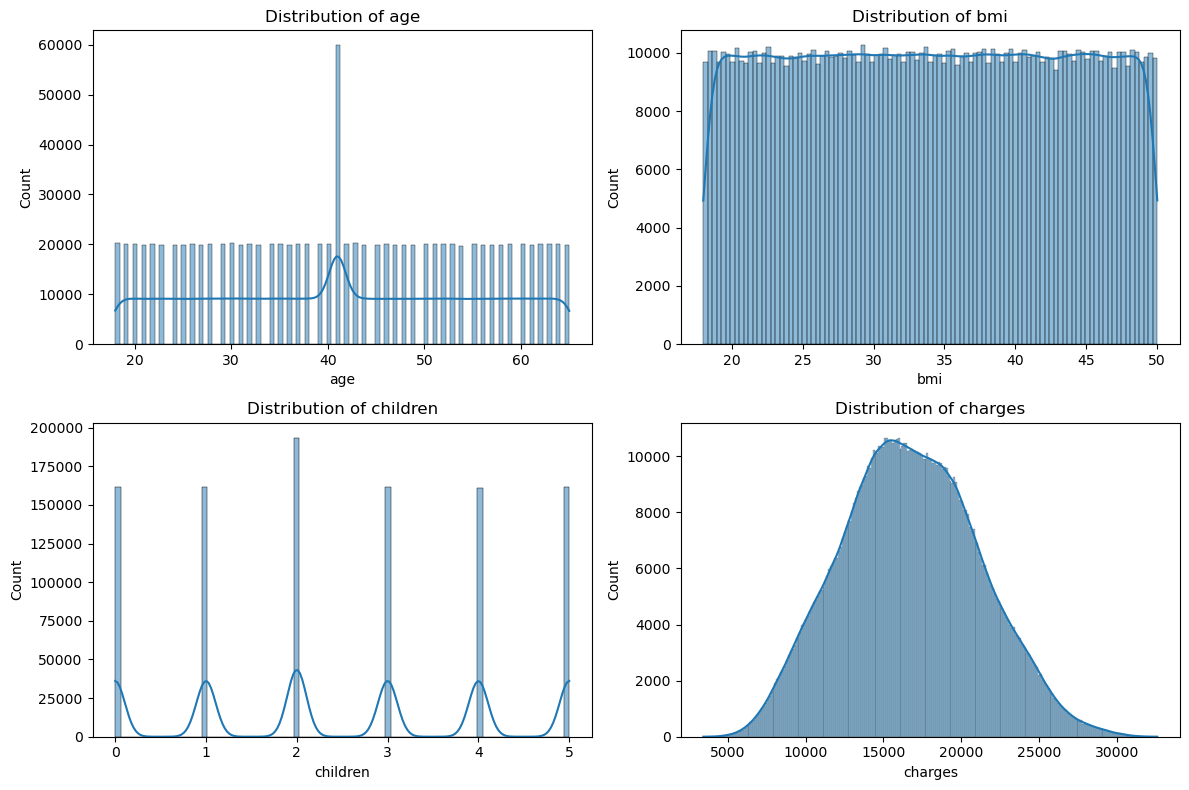

In [12]:
# Assuming numeric_cols contains the list of numeric columns
numeric_cols = ['age', 'bmi', 'children', 'charges']

# Create a 2x2 grid of plots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Loop through numeric columns and corresponding subplot axes
for i, col in enumerate(numeric_cols):
    row, col_index = divmod(i, 2)  # Calculate row and column index
    sns.histplot(df[col], kde=True, ax=axes[row, col_index])
    axes[row, col_index].set_title(f'Distribution of {col}')

plt.tight_layout()  # Adjust spacing between plots
plt.show()

In [13]:
print(df['age'].value_counts().head())

age
41.0    59897
43.0    20276
30.0    20217
18.0    20185
40.0    20135
Name: count, dtype: int64


In [14]:

# Define age bins and labels
bins = [0, 30, 50, 65, float('inf')]  # 65+ for older individuals
labels = ['Young', 'Middle-aged', 'Senior', 'Elderly']

# Create a new column for age groups
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels)

print(df[['age', 'age_group']].head())


    age    age_group
0  46.0  Middle-aged
1  25.0        Young
2  38.0  Middle-aged
3  25.0        Young
4  49.0  Middle-aged


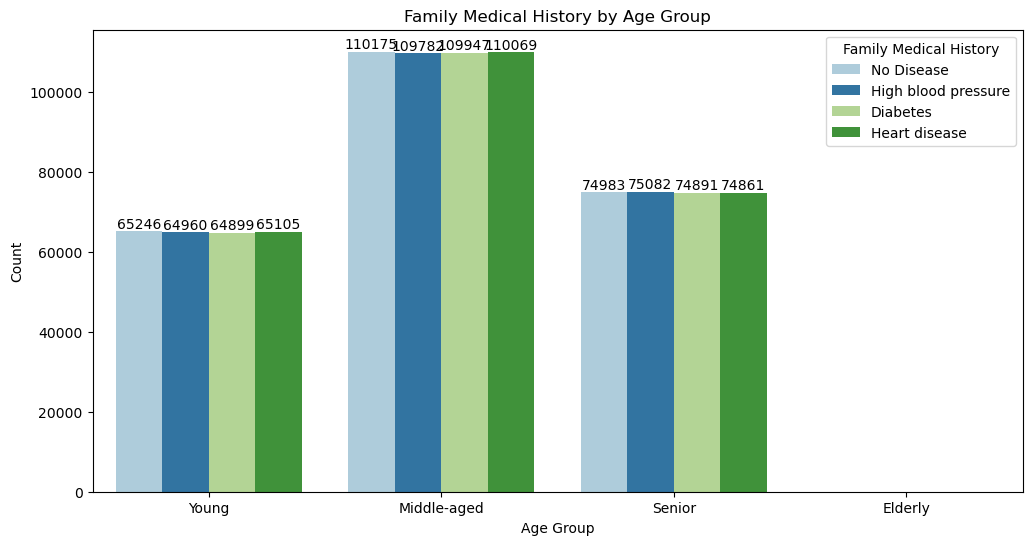

In [15]:
# Plotting the chart
plt.figure(figsize=(12, 6))
ax = sns.countplot(data=df, x='age_group', hue='family_medical_history', palette='Paired')

# Add value labels on top of each bar
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom', fontsize=10, color='black')

plt.title('Family Medical History by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Family Medical History')
plt.show()

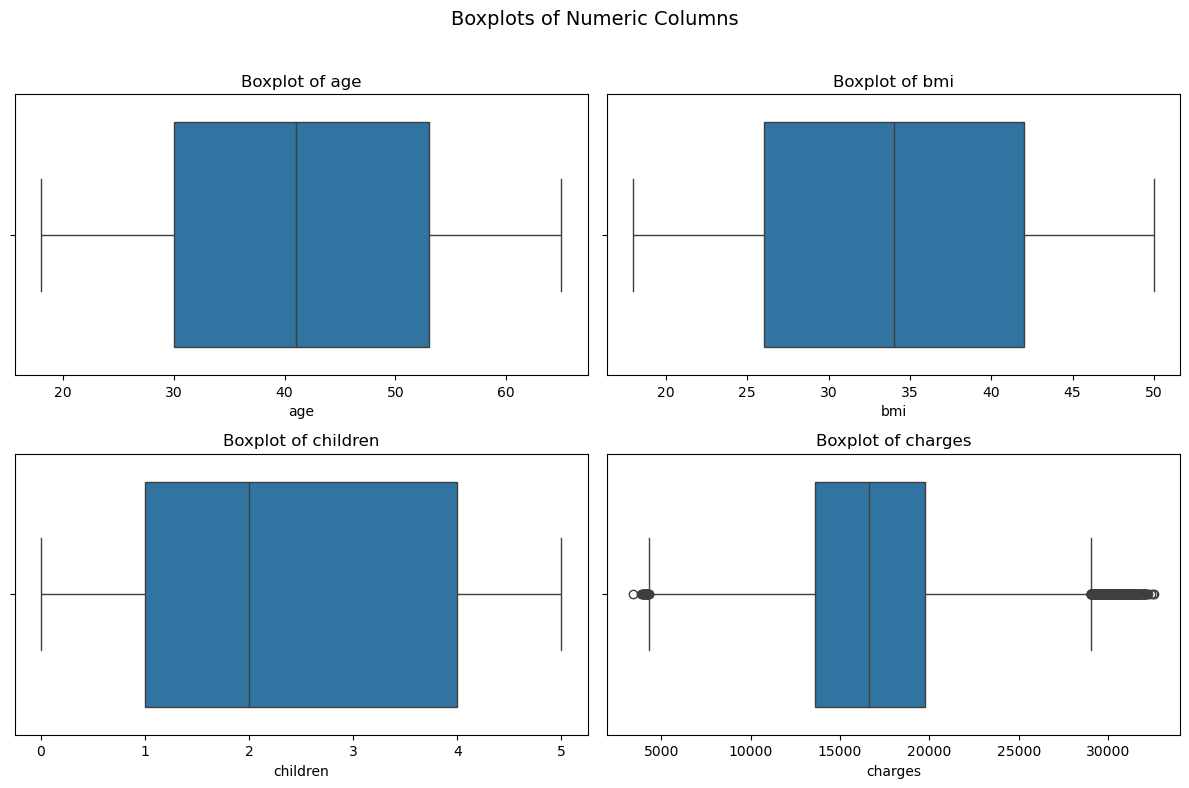

In [16]:

# List of numeric columns
numeric_cols = ['age', 'bmi', 'children', 'charges']  # Update this with your actual column names

# Create a 2x2 subplot
fig, axes = plt.subplots(2, 2, figsize=(12, 8))  # 2 rows, 2 columns
fig.suptitle("Boxplots of Numeric Columns", fontsize=14)  # Main title

# Flatten the axes array to make iteration easier
axes = axes.flatten()

# Loop through each numeric column and plot
for i, col in enumerate(numeric_cols):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')

# Adjust layout to prevent overlapping
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Leaves space for the main title
plt.show()


# Applying log transformation to 'charges' to reduce skewness and handle outliers.
# This helps normalize the data for better visualization and improves model performance.
# 'log_charges' is created as a new column to preserve the original 'charges' values.
# df['log_charges'] = np.log(df['charges'] + 1)      # Adding 1 to avoid log(0)

In [18]:

# Function to apply log transformation
def log_transform(df, numeric_cols):
    for col in numeric_cols:
        if col == 'charges':
            df['log_charges'] = np.log(df['charges'] + 1)  # Adding 1 to avoid log(0)
    return df

# Example usage
numeric_cols = ['age', 'bmi', 'children', 'charges']
df = log_transform(df, numeric_cols)

# Verify transformation
print(df[['charges', 'log_charges']].head())


        charges  log_charges
0  20460.307669     9.926291
1  20390.899218     9.922893
2  20204.476302     9.913709
3  11789.029843     9.375010
4  19268.309838     9.866269


# Replotting the distributions to compare the original 'charges' with the transformed 'log_charges'.
# This helps visualize the effect of log transformation, showing how it reduces skewness
# and makes the data more normally distributed for better analysis and model accuracy.


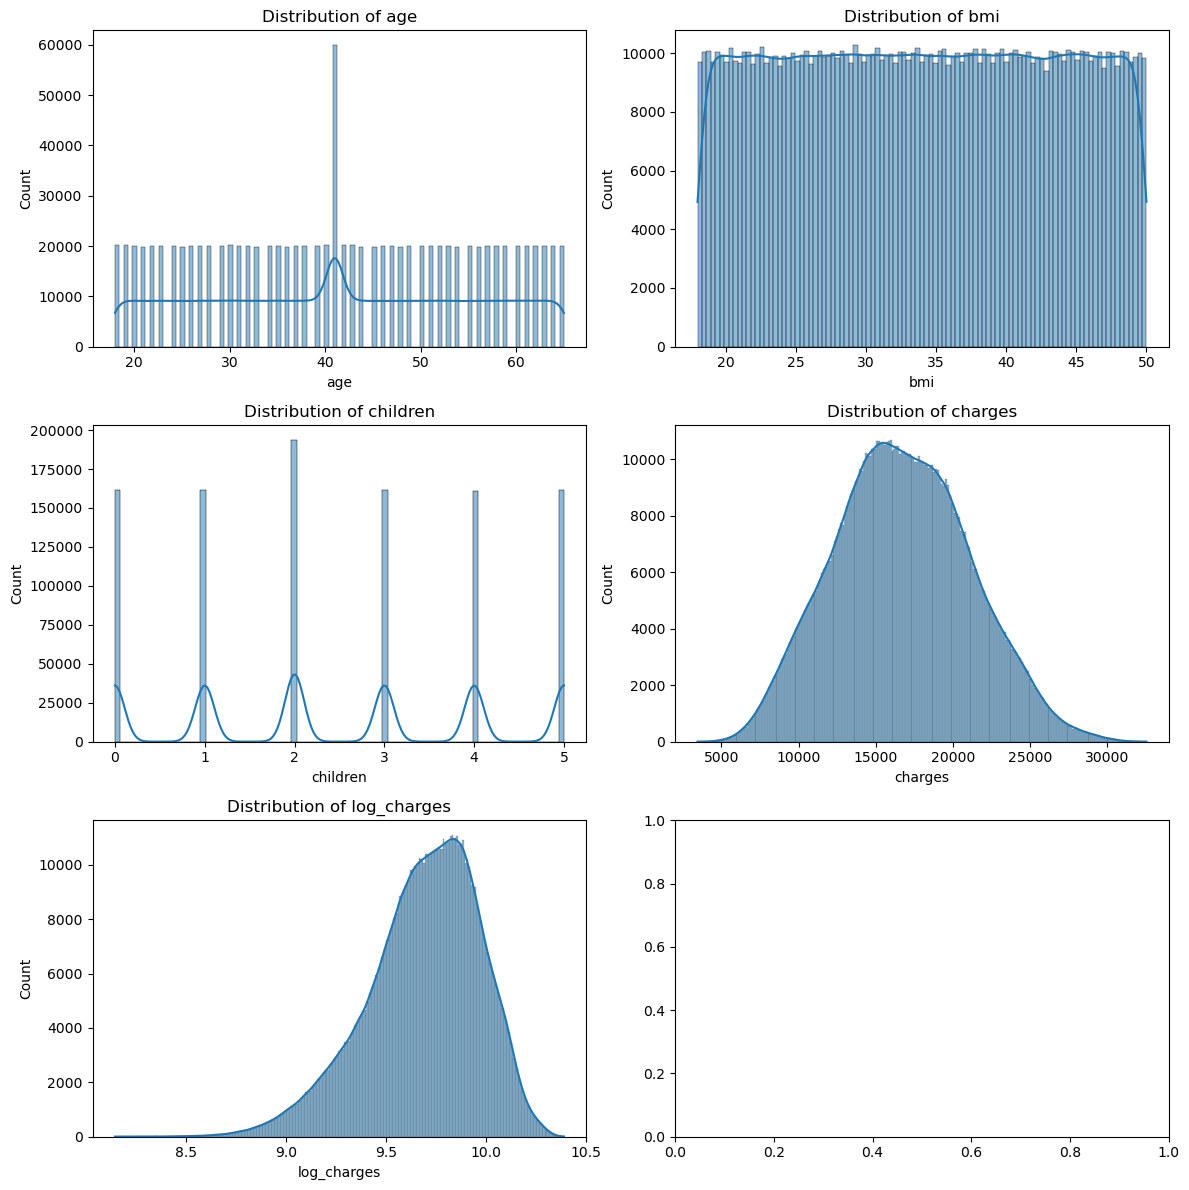

In [20]:

# Assuming numeric_cols contains the updated list of numeric columns
numeric_cols = ['age', 'bmi', 'children', 'charges', 'log_charges']

# Create a 3x2 grid if you have 5 columns now (adjust as needed)
fig, axes = plt.subplots(3, 2, figsize=(12, 12))

# Loop through numeric columns and corresponding subplot axes
for i, col in enumerate(numeric_cols):
    row, col_index = divmod(i, 2)  # Calculate row and column index
    sns.histplot(df[col], kde=True, ax=axes[row, col_index])
    axes[row, col_index].set_title(f'Distribution of {col}')

plt.tight_layout()  # Adjust spacing between plots
plt.show()


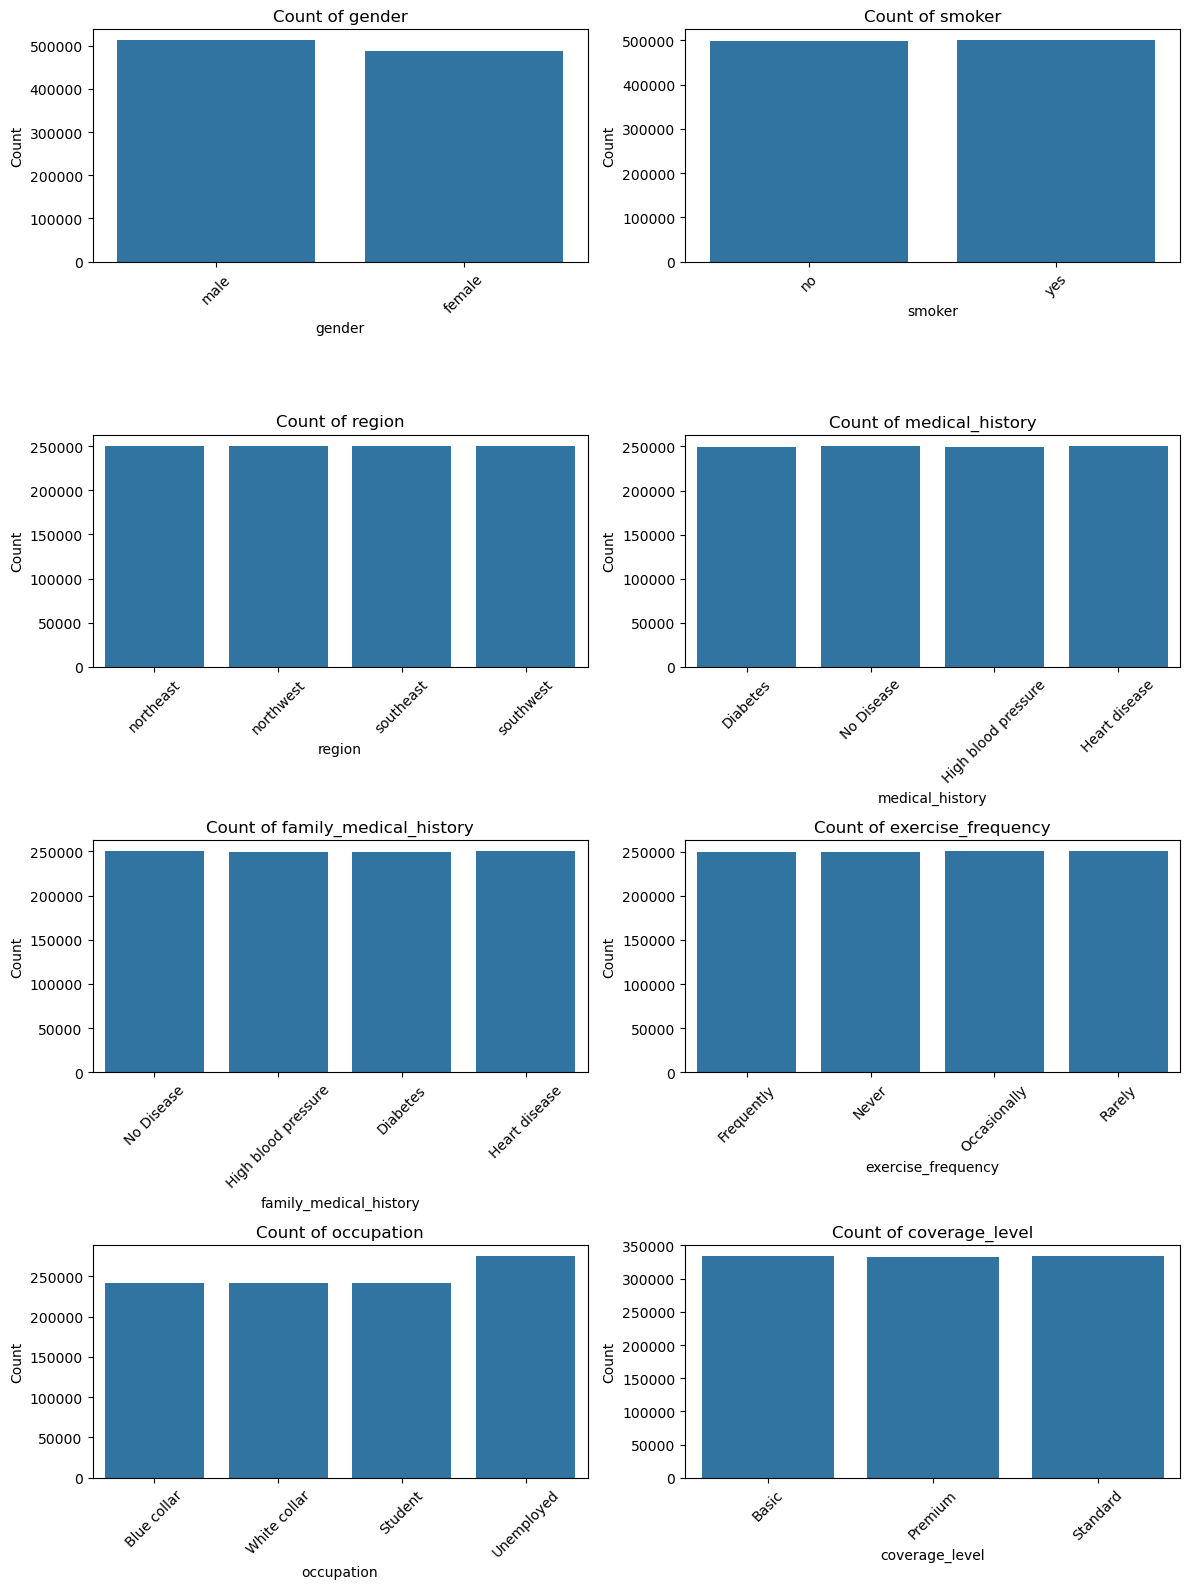

In [21]:
import math

# Calculate grid size based on the number of categorical columns
num_cols = len(category_cols)
rows = math.ceil(num_cols / 2)  # At least 2 columns, adjust rows dynamically

# Create subplots with dynamic rows and 2 columns
fig, axes = plt.subplots(rows, 2, figsize=(12, 4 * rows))

# Flatten axes for easier indexing if there are multiple rows
axes = axes.flatten()

# Loop through categorical columns and corresponding subplot axes
for i, col in enumerate(category_cols):
    sns.countplot(x=df[col], ax=axes[i])
    axes[i].set_title(f'Count of {col}')
    axes[i].set_ylabel('Count')
    axes[i].set_xlabel(col)
    axes[i].tick_params(axis='x', rotation=45)  # Rotate labels for better readability

# Hide any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()  # Adjust layout for better spacing
plt.show()


# B. Bivariate Analysis (Relationship Between Two Features)

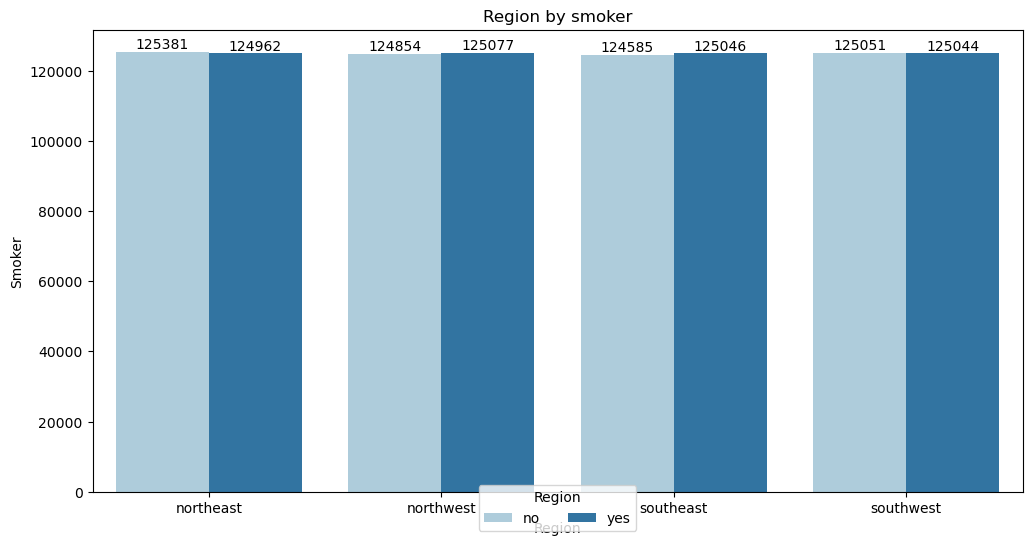

In [23]:
# Plotting the chart
plt.figure(figsize=(12, 6))
ax = sns.countplot(data=df, x='region', hue='smoker', palette='Paired')

# Add value labels on top of each bar
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom', fontsize=10, color='black')

plt.title('Region by smoker')
plt.xlabel('Region')
plt.ylabel('Smoker')
plt.legend(title='Region',loc='lower center', bbox_to_anchor=(0.5, -0.1), ncol=2)
plt.show()

# Note:
# df['smoker'] = df['smoker'].map({'yes': 1, 'no': 0})


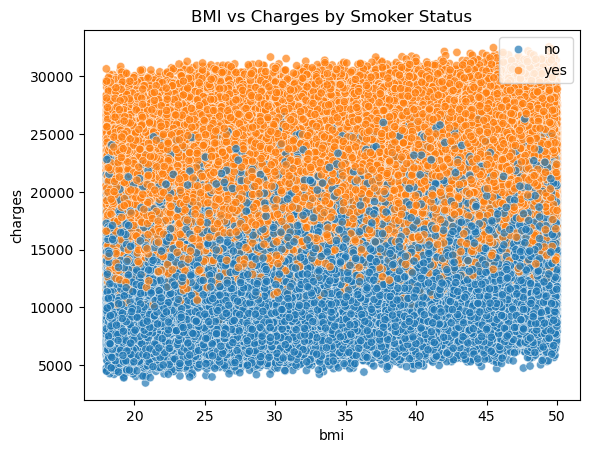

In [24]:

sns.scatterplot(x='bmi', y='charges', hue='smoker', data=df, alpha=0.7)

# Set a fixed legend position (e.g., 'upper right', 'lower left', etc.)
plt.legend(loc='upper right')

plt.title('BMI vs Charges by Smoker Status')
plt.show()


# Smokers pay more in medical charges regardless of BMI.

# Smoking has a substantial financial impact on medical expenses.

# BMI influences costs but smoking is a stronger factor driving higher charges.

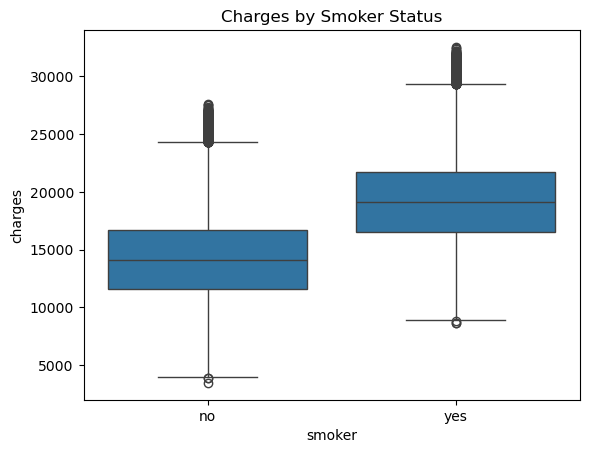

In [26]:
sns.boxplot(x='smoker', y='charges', data=df)
plt.title('Charges by Smoker Status')
plt.show()


In [27]:
from scipy.stats import ttest_ind

smokers = df[df['smoker'] == 'yes']['charges']
non_smokers = df[df['smoker'] == 'no']['charges']

stat, p_value = ttest_ind(smokers, non_smokers)
print(f'T-test p-value: {p_value}')


T-test p-value: 0.0


In [28]:

# Since the p-value is 0.0, it indicates that the difference in medical charges between smokers and 

# non-smokers is statistically significant at any reasonable significance level (e.g., 0.05 or 0.01).

# Strong Evidence of a Difference:
# There is a significant and non-random difference in medical charges based on smoking status.
# Smokers tend to have much higher medical costs than non-smokers.


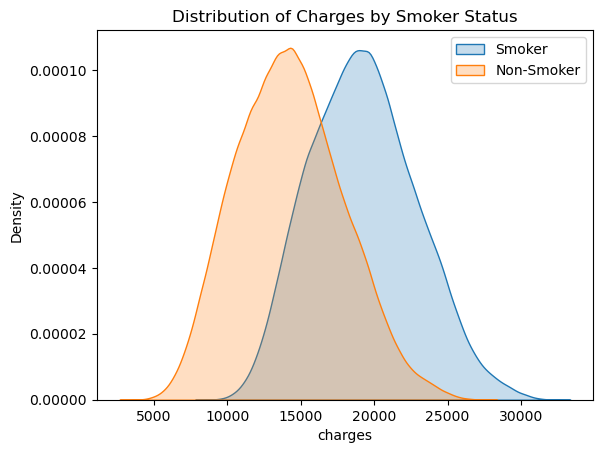

In [29]:

sns.kdeplot(df[df['smoker'] == 'yes']['charges'], label='Smoker', fill=True)
sns.kdeplot(df[df['smoker'] == 'no']['charges'], label='Non-Smoker', fill=True)

plt.title('Distribution of Charges by Smoker Status')
plt.legend()
plt.show()


In [30]:
# From this KDE (Kernel Density Estimation) plot, we can interpret the following:


# 1. Smokers Pay Higher Charges on Average
# The Smoker distribution (blue) is shifted to the right, meaning that smokers generally incur higher medical charges compared to non-smokers.

# Non-smokers (orange) are concentrated in a lower range of medical charges.

# 2. Difference in Central Tendency
# The peak (mode) of the non-smoker distribution is lower than that of smokers, confirming that smokers are charged more on average.

# 3. Overlap Area
# There is some overlap between the two groups, meaning not all smokers pay high charges, and not all non-smokers pay low charges.

# 4. Spread (Variance)
# The Smoker group has a wider spread, indicating that the range of charges for smokers is more variable. 
# This suggests that smokers may face higher medical risks leading to increased costs.



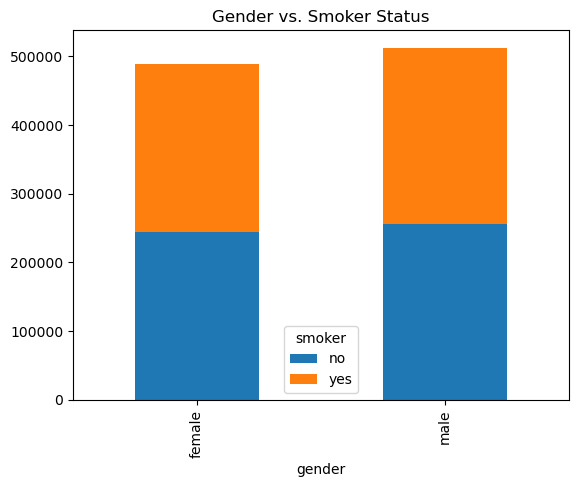

In [31]:
pd.crosstab(df['gender'], df['smoker']).plot(kind='bar', stacked=True)
plt.title('Gender vs. Smoker Status')
plt.show()


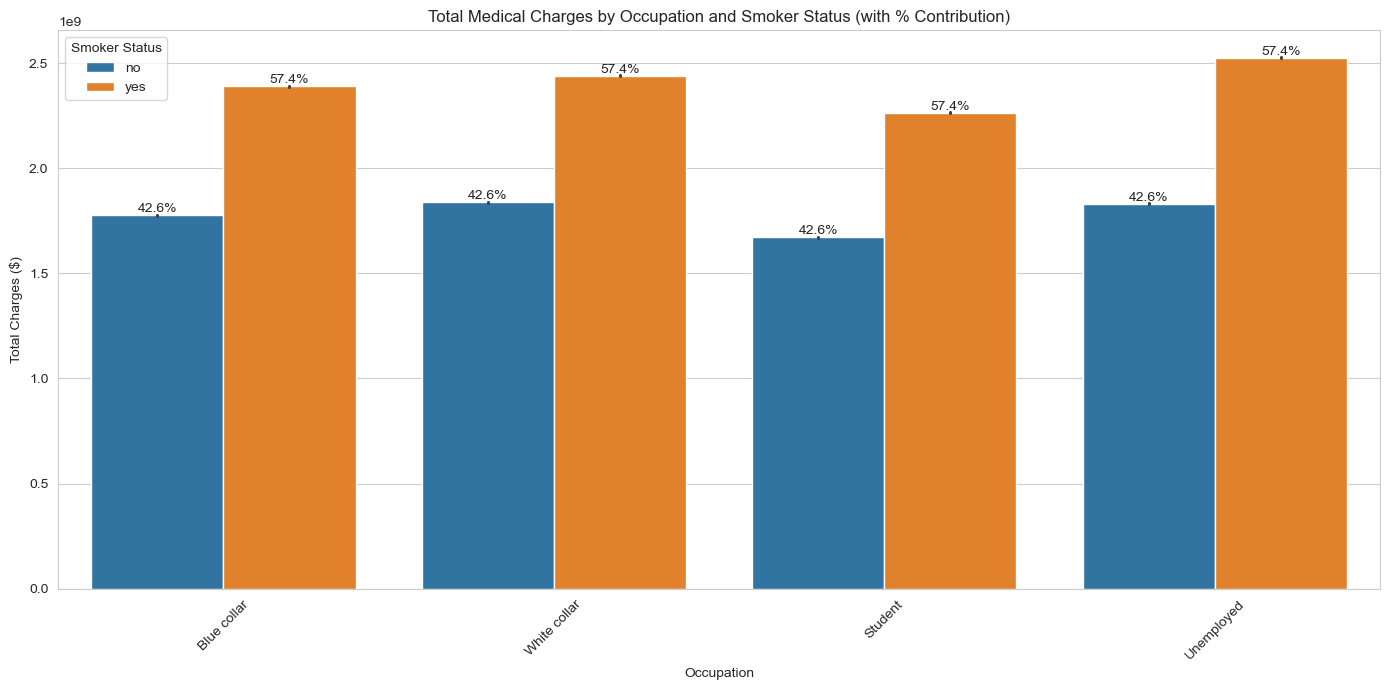

In [32]:
# Ensure seaborn style is set for better visuals
sns.set_style("whitegrid")

# Calculate total charges within each occupation group
occupation_total = df.groupby('occupation', observed=False)['charges'].transform('sum')

# Calculate the percentage of charges for each record
df['charge_percentage'] = (df['charges'] / occupation_total) * 100

# Create the barplot
plt.figure(figsize=(14, 7))
ax = sns.barplot(x='occupation', y='charges', hue='smoker', data=df, estimator='sum')

# Ensure correct percentages for each (occupation, smoker) group
charge_percentages = (
    df.groupby(['occupation', 'smoker'], observed=False)['charges']
    .sum()
    .reset_index()
)

# Calculate the percentage of each group within their occupation
charge_percentages['charge_percentage'] = charge_percentages.groupby('occupation', observed=False)['charges'].transform(lambda x: (x / x.sum()) * 100)

# Add percentage labels on bars
for container, (occupation, smoker) in zip(ax.containers, charge_percentages[['occupation', 'smoker']].values):
    percent = charge_percentages[(charge_percentages['occupation'] == occupation) & (charge_percentages['smoker'] == smoker)]['charge_percentage'].values[0]
    ax.bar_label(container, labels=[f'{percent:.1f}%' for _ in container], label_type='edge', fontsize=10)

# Finalize the plot
plt.title('Total Medical Charges by Occupation and Smoker Status (with % Contribution)')
plt.ylabel('Total Charges ($)')
plt.xlabel('Occupation')
plt.xticks(rotation=45)
plt.legend(title='Smoker Status')
plt.tight_layout()
plt.show()


In [33]:
# General Insight:
# Smokers have higher medical costs across all occupations (~57.4%), 
# showing a clear link between smoking and increased healthcare expenses.

# Blue Collar Workers:
# Smokers contribute more to medical charges (57.4%)—indicating that physically demanding jobs 
# combined with smoking may worsen health issues.

# Students:
# Student smokers account for 57.4% of total medical costs, suggesting that smoking impacts health 
# even at a younger age.

# Unemployed Individuals:
# Higher medical costs (57.4%) for smokers suggest that smoking during unemployment may worsen 
# health problems, increasing healthcare expenses.

# White Collar Workers:
# Despite less physical strain, white-collar smokers still contribute 57.4% of medical costs, 
# highlighting that smoking’s impact is significant across job types.

# Key Takeaway:
# Across all occupations, smokers consistently drive higher medical costs, emphasizing the 
# economic and health burden of smoking.


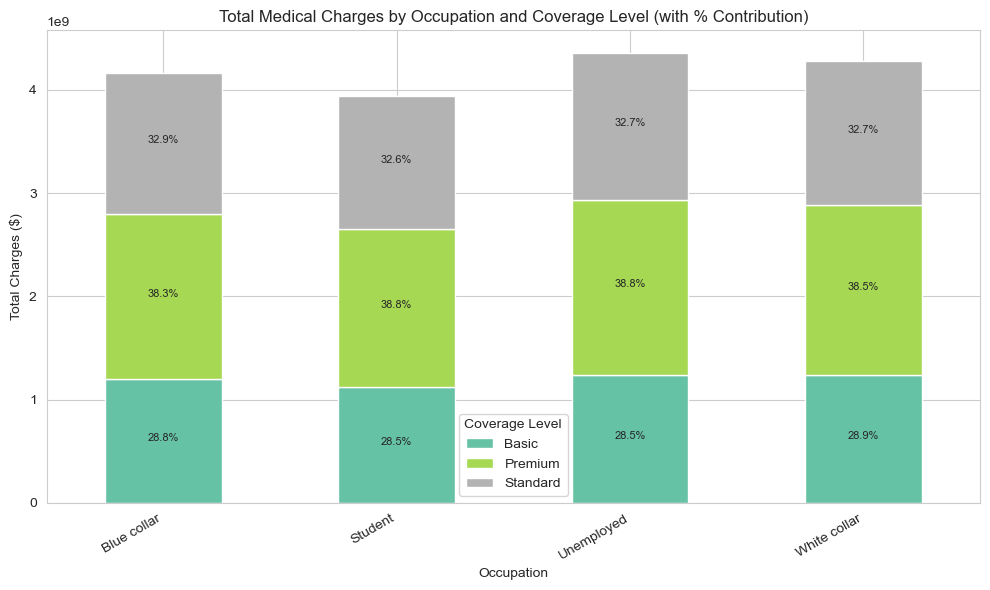

In [34]:

# Group by 'occupation' and 'coverage_level', calculate total charges
occupation_coverage = df.groupby(['occupation', 'coverage_level'], observed=False)['charges'].sum().reset_index()

# Calculate percentage contribution within each occupation (with observed=False to avoid warning)
total_charges_by_occupation = occupation_coverage.groupby('occupation', observed=False)['charges'].transform('sum')
occupation_coverage['percentage'] = (occupation_coverage['charges'] / total_charges_by_occupation * 100).round(1)

# Pivot the data for visualization
pivot_data = occupation_coverage.pivot(index='occupation', columns='coverage_level', values='charges')

# Plotting the stacked bar chart
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

# Stacked bar chart
pivot_data.plot(kind='bar', stacked=True, cmap='Set2', ax=plt.gca())

# Add percentage labels
for i, occupation in enumerate(pivot_data.index):
    total = pivot_data.loc[occupation].sum()
    cumulative = 0
    for coverage in pivot_data.columns:
        value = pivot_data.at[occupation, coverage]
        percent = (value / total) * 100
        plt.text(i, cumulative + value / 2, f'{percent:.1f}%', ha='center', fontsize=8)
        cumulative += value

plt.title('Total Medical Charges by Occupation and Coverage Level (with % Contribution)')
plt.xlabel('Occupation')
plt.ylabel('Total Charges ($)')
plt.xticks(rotation=30, ha='right')
plt.legend(title='Coverage Level')
plt.tight_layout()
plt.show()


In [35]:
# Premium Plans Drive Costs:
# A significant portion of medical costs comes from Premium plans, which may indicate either higher premiums or 
# more comprehensive usage of healthcare services under these plans.

# Uniform Usage Patterns:
# Similar percentages across occupations imply consistent healthcare needs and insurance utilization across different work categories.

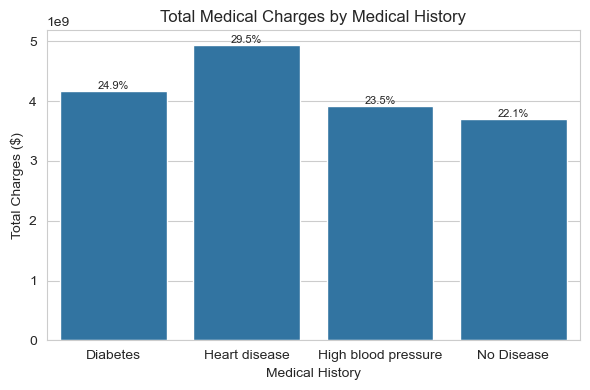

In [36]:
# Group by 'medical_history' and calculate total charges
medical_history_charges = df.groupby('medical_history', observed=False)['charges'].sum().reset_index()

# Calculate percentage contribution
total_charges = medical_history_charges['charges'].sum()
medical_history_charges['percentage'] = (medical_history_charges['charges'] / total_charges * 100).round(1)

# Plotting the bar chart
plt.figure(figsize=(6, 4))
sns.set_style("whitegrid")

# Bar chart
ax = sns.barplot(x='medical_history', y='charges', data=medical_history_charges)

# Add percentage labels
for i, row in medical_history_charges.iterrows():
    ax.text(i, row.charges, f"{row.percentage}%", ha='center', va='bottom', fontsize=8)

plt.title('Total Medical Charges by Medical History')
plt.xlabel('Medical History')
plt.ylabel('Total Charges ($)')
plt.tight_layout()
plt.show()

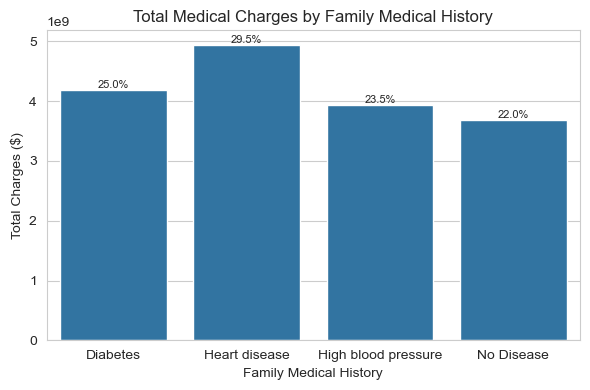

In [37]:
# Group by 'family_medical_history' and calculate total charges
family_medical_history_charges = df.groupby('family_medical_history', observed=False)['charges'].sum().reset_index()

# Calculate percentage contribution
total_family_charges = family_medical_history_charges['charges'].sum()
family_medical_history_charges['percentage'] = (family_medical_history_charges['charges'] / total_family_charges * 100).round(1)

# Plotting the bar chart for family medical history
plt.figure(figsize=(6, 4))
sns.set_style("whitegrid")

# Bar chart
ax = sns.barplot(x='family_medical_history', y='charges', data=family_medical_history_charges)

# Add percentage labels
for i, row in family_medical_history_charges.iterrows():
    ax.text(i, row.charges, f"{row.percentage}%", ha='center', va='bottom', fontsize=8)

plt.title('Total Medical Charges by Family Medical History')
plt.xlabel('Family Medical History')
plt.ylabel('Total Charges ($)')
plt.tight_layout()
plt.show()

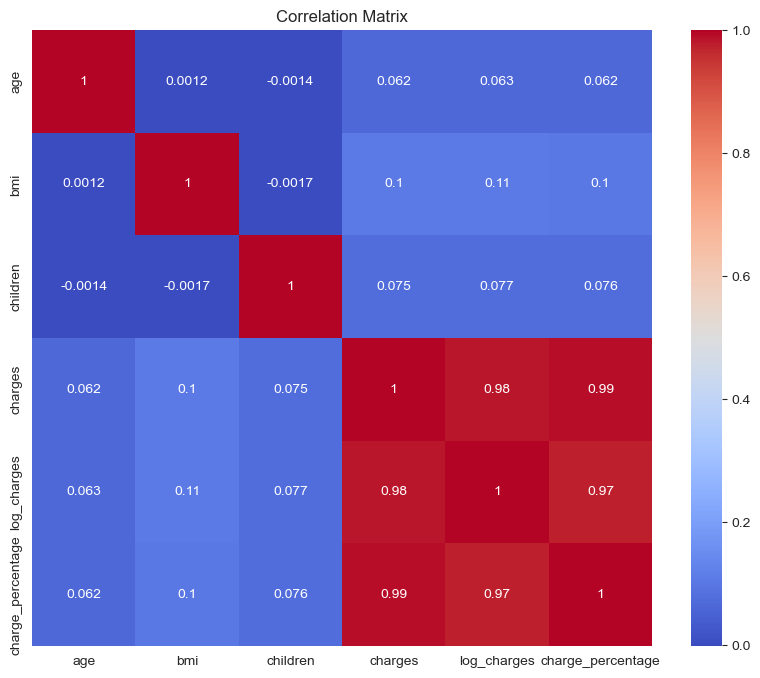

In [38]:
# Correlation matrix including age_group and log_charges
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [39]:
# Statistical Tests
from scipy import stats

# 1. Numerical Features vs log_charges (Pearson Correlation)
print("\nNumerical Features Correlation with log_charges:\n")
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns
for feature in numerical_features:
    if feature != 'log_charges':
        corr, p_value = stats.pearsonr(df[feature], df['log_charges'])
        significance = "Significant" if p_value <= 0.05 else "Not Significant"
        print(f"{feature}: Correlation = {corr:.4f}, p-value = {p_value:.4f} ({significance})")

# 2. Categorical Features vs log_charges (ANOVA Test)
print("\nCategorical Features ANOVA with log_charges:\n")
categorical_features = df.select_dtypes(include=['object', 'category']).columns
for feature in categorical_features:
    groups = [df['log_charges'][df[feature] == cat] for cat in df[feature].unique()]
    f_stat, p_value = stats.f_oneway(*groups)
    significance = "Significant" if p_value <= 0.05 else "Not Significant"
    print(f"{feature}: F-statistic = {f_stat:.4f}, p-value = {p_value:.4f} ({significance})")



Numerical Features Correlation with log_charges:

age: Correlation = 0.0633, p-value = 0.0000 (Significant)
bmi: Correlation = 0.1058, p-value = 0.0000 (Significant)
children: Correlation = 0.0766, p-value = 0.0000 (Significant)
charges: Correlation = 0.9833, p-value = 0.0000 (Significant)
charge_percentage: Correlation = 0.9729, p-value = 0.0000 (Significant)

Categorical Features ANOVA with log_charges:

gender: F-statistic = 12772.6917, p-value = 0.0000 (Significant)
smoker: F-statistic = 463366.0612, p-value = 0.0000 (Significant)
region: F-statistic = 1659.0567, p-value = 0.0000 (Significant)
medical_history: F-statistic = 67287.7652, p-value = 0.0000 (Significant)
family_medical_history: F-statistic = 67238.8543, p-value = 0.0000 (Significant)
exercise_frequency: F-statistic = 9612.0275, p-value = 0.0000 (Significant)
occupation: F-statistic = 10351.9816, p-value = 0.0000 (Significant)
coverage_level: F-statistic = 134529.9263, p-value = 0.0000 (Significant)
age_group: F-statist

In [40]:
# Numerical Features:
# Charges (0.9833) and Charge Percentage (0.9729) show very strong positive correlations with log_charges.
# These are the most important features in predicting insurance premiums.
# BMI (0.1058), Children (0.0766), and Age (0.0633) show weak but significant correlations.
# While these have a smaller direct impact, they still contribute meaningfully to the prediction.

# Categorical Features: All categorical variables show very small p-values (0.0000) and high F-statistics, 
# indicating they significantly influence log_charges.

# Key Influencers (High F-statistics):
# Smoker (463366.06): Strongest impact—smoking status drastically affects insurance costs.
# Coverage Level (134529.93): Different coverage levels strongly influence premium amounts.
# Medical History & Family Medical History (~67287): Prior health conditions and family medical history are significant factors.

# Moderate Influencers:
# Gender (12772.69) and Exercise Frequency (9612.03): While significant, their impact is relatively smaller than the above.


In [41]:
# Label Encoding for the gender and smoker columns

df['gender'] = df['gender'].map({'male': 1, 'female': 0})
df['smoker'] = df['smoker'].map({'yes': 1, 'no': 0})

print(df[['gender', 'smoker']].head())

   gender smoker
0       1      1
1       0      1
2       1      1
3       1      0
4       1      1


In [42]:
# One Hot Encoding for other categorical data 

one_hot_cols = ['region', 'medical_history', 'family_medical_history',
                'exercise_frequency', 'occupation', 'coverage_level']

df = pd.get_dummies(df, columns=one_hot_cols, prefix=one_hot_cols, drop_first=True)

# Display the updated DataFrame
print(df.head())

    age  gender    bmi  children smoker       charges    age_group  \
0  46.0       1  21.45       5.0      1  20460.307669  Middle-aged   
1  25.0       0  25.38       2.0      1  20390.899218        Young   
2  38.0       1  44.88       2.0      1  20204.476302  Middle-aged   
3  25.0       1  19.89       0.0      0  11789.029843        Young   
4  49.0       1  38.21       3.0      1  19268.309838  Middle-aged   

   log_charges  charge_percentage  region_northwest  ...  \
0     9.926291           0.000491             False  ...   
1     9.922893           0.000477              True  ...   
2     9.913709           0.000485             False  ...   
3     9.375010           0.000276              True  ...   
4     9.866269           0.000450              True  ...   

   family_medical_history_High blood pressure  \
0                                       False   
1                                        True   
2                                        True   
3                     

In [43]:
# Identify boolean columns
bool_cols = df.select_dtypes(include='bool').columns

# Convert only boolean columns to integers
df[bool_cols] = df[bool_cols].astype(int)

# Verify the DataFrame
print(df.head())


    age  gender    bmi  children smoker       charges    age_group  \
0  46.0       1  21.45       5.0      1  20460.307669  Middle-aged   
1  25.0       0  25.38       2.0      1  20390.899218        Young   
2  38.0       1  44.88       2.0      1  20204.476302  Middle-aged   
3  25.0       1  19.89       0.0      0  11789.029843        Young   
4  49.0       1  38.21       3.0      1  19268.309838  Middle-aged   

   log_charges  charge_percentage  region_northwest  ...  \
0     9.926291           0.000491                 0  ...   
1     9.922893           0.000477                 1  ...   
2     9.913709           0.000485                 0  ...   
3     9.375010           0.000276                 1  ...   
4     9.866269           0.000450                 1  ...   

   family_medical_history_High blood pressure  \
0                                           0   
1                                           1   
2                                           1   
3                     

In [44]:
df

,age,gender,bmi,children,smoker,charges,age_group,log_charges,charge_percentage,region_northwest,...,family_medical_history_High blood pressure,family_medical_history_No Disease,exercise_frequency_Never,exercise_frequency_Occasionally,exercise_frequency_Rarely,occupation_Student,occupation_Unemployed,occupation_White collar,coverage_level_Premium,coverage_level_Standard
0,46.0,1,21.45,5.0,1,20460.307669,Middle-aged,9.926291,0.000491,0,...,0,1,1,0,0,0,0,0,1,0
1,25.0,0,25.38,2.0,1,20390.899218,Young,9.922893,0.000477,1,...,1,0,0,1,0,0,0,1,1,0
2,38.0,1,44.88,2.0,1,20204.476302,Middle-aged,9.913709,0.000485,0,...,1,0,0,1,0,0,0,0,1,0
3,25.0,1,19.89,0.0,0,11789.029843,Young,9.375010,0.000276,1,...,0,0,0,0,1,0,0,1,0,1
4,49.0,1,38.21,3.0,1,19268.309838,Middle-aged,9.866269,0.000450,1,...,1,0,0,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,59.0,1,46.67,2.0,0,11584.134900,Senior,9.357478,0.000294,0,...,0,1,0,0,0,1,0,0,0,0
999996,33.0,1,36.83,2.0,0,9834.871456,Middle-aged,9.193791,0.000226,0,...,1,0,0,0,0,0,1,0,0,0
999997,39.0,1,39.84,0.0,1,22076.632856,Middle-aged,10.002320,0.000530,0,...,1,0,0,0,1,0,0,0,0,1
999998,37.0,0,45.06,4.0,1,20297.618728,Middle-aged,9.918308,0.000466,0,...,0,0,0,1,0,0,1,0,1,0


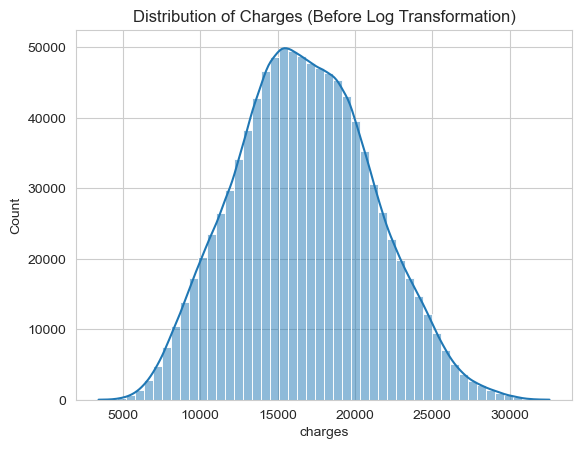

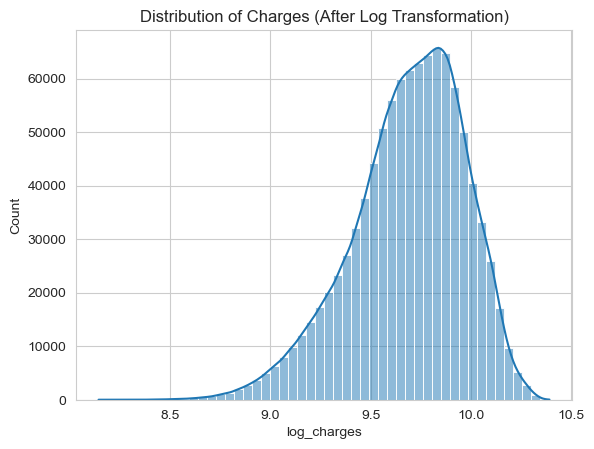

In [45]:

# Before transformation
sns.histplot(df['charges'], bins=50, kde=True)
plt.title('Distribution of Charges (Before Log Transformation)')
plt.show()

# After transformation
sns.histplot(df['log_charges'], bins=50, kde=True)
plt.title('Distribution of Charges (After Log Transformation)')
plt.show()


In [46]:
# y_true_charges = df['charges']

# # Drop unnecessary columns but keep 'charges' for later comparison
# df.drop(['age_group', 'children', 'charge_percentage'], axis=1, inplace=True)


In [47]:
df

,age,gender,bmi,children,smoker,charges,age_group,log_charges,charge_percentage,region_northwest,...,family_medical_history_High blood pressure,family_medical_history_No Disease,exercise_frequency_Never,exercise_frequency_Occasionally,exercise_frequency_Rarely,occupation_Student,occupation_Unemployed,occupation_White collar,coverage_level_Premium,coverage_level_Standard
0,46.0,1,21.45,5.0,1,20460.307669,Middle-aged,9.926291,0.000491,0,...,0,1,1,0,0,0,0,0,1,0
1,25.0,0,25.38,2.0,1,20390.899218,Young,9.922893,0.000477,1,...,1,0,0,1,0,0,0,1,1,0
2,38.0,1,44.88,2.0,1,20204.476302,Middle-aged,9.913709,0.000485,0,...,1,0,0,1,0,0,0,0,1,0
3,25.0,1,19.89,0.0,0,11789.029843,Young,9.375010,0.000276,1,...,0,0,0,0,1,0,0,1,0,1
4,49.0,1,38.21,3.0,1,19268.309838,Middle-aged,9.866269,0.000450,1,...,1,0,0,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,59.0,1,46.67,2.0,0,11584.134900,Senior,9.357478,0.000294,0,...,0,1,0,0,0,1,0,0,0,0
999996,33.0,1,36.83,2.0,0,9834.871456,Middle-aged,9.193791,0.000226,0,...,1,0,0,0,0,0,1,0,0,0
999997,39.0,1,39.84,0.0,1,22076.632856,Middle-aged,10.002320,0.000530,0,...,1,0,0,0,1,0,0,0,0,1
999998,37.0,0,45.06,4.0,1,20297.618728,Middle-aged,9.918308,0.000466,0,...,0,0,0,1,0,0,1,0,1,0


In [48]:
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler

# def train_test_split_and_scale(df):
#     y = df["log_charges"]
#     x = df.drop("log_charges", axis=1)
#     features = list(x.columns)

#     # First split: training (70%), testing (30%)
#     x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=100, shuffle=False)

#     # Second split: evaluation (20%), live (80%) from training
#     x_eval, x_live, y_eval, y_live = train_test_split(x_train, y_train, train_size=200000, random_state=100, shuffle=False)

#     # Scale features using StandardScaler
#     scaler = StandardScaler()
#     x_train = scaler.fit_transform(x_train)  # Fit on training data
#     x_test = scaler.transform(x_test)        # Transform other datasets
#     x_eval = scaler.transform(x_eval)
#     x_live = scaler.transform(x_live)

#     return x_train, x_test, y_train, y_test, x_eval, x_live, y_eval, y_live, features


In [49]:
# X_train, X_test, y_train, y_test, X_eval, X_live, y_eval, y_live, features = train_test_split_and_scale(df)


In [50]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Check if 'charges' column exists and copy it for later evaluation
if 'charges' in df.columns:
    y_true_charges = df['charges'].copy()
else:
    raise KeyError("Column 'charges' is missing from the DataFrame")

# Drop unnecessary columns (ignore errors if columns are missing)
df.drop(['age_group', 'children', 'charge_percentage', 'charges'], axis=1, inplace=True, errors='ignore')

# Function to split and scale the dataset
def train_test_split_and_scale(df):
    # Ensure the target column 'log_charges' exists
    if 'log_charges' not in df.columns:
        raise KeyError("Column 'log_charges' is missing from the DataFrame")

    # Separate features (X) and target (y)
    y = df["log_charges"]  # Target is the log-transformed 'charges'
    X = df.drop("log_charges", axis=1)  # Features
    features = list(X.columns)  # Keep track of feature names

    # Split data:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100, shuffle=False)

    # Further split training into evaluation and live datasets
    X_eval, X_live, y_eval, y_live = train_test_split(X_train, y_train, train_size=200000, random_state=100, shuffle=False)

    # Scale the data (fit on training, transform on all)
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    X_eval = scaler.transform(X_eval)
    X_live = scaler.transform(X_live)

    return X_train, X_test, y_train, y_test, X_eval, X_live, y_eval, y_live, features, scaler


In [51]:
# Call the function and retrieve the datasets
X_train, X_test, y_train, y_test, X_eval, X_live, y_eval, y_live, features, scaler = train_test_split_and_scale(df)

print(f"Training size: {X_train.shape}, Testing size: {X_test.shape}")
print(f"Evaluation size: {X_eval.shape}, Live size: {X_live.shape}")

Training size: (700000, 21), Testing size: (300000, 21)
Evaluation size: (200000, 21), Live size: (500000, 21)


In [52]:
# Function to train and evaluate the RandomForest model
def fit_and_evaluate_model(X_train, X_test, y_train, y_test, y_true_charges, max_depth=5, min_samples_split=0.01, max_features=0.8, max_samples=0.8):
    # Initialize RandomForest model
    model = RandomForestRegressor(random_state=0,
                                  max_depth=max_depth,
                                  min_samples_split=min_samples_split,
                                  max_features=max_features,
                                  max_samples=max_samples)

    # Train the model
    model.fit(X_train, y_train)

    # Predict on test data (in log scale)
    y_pred_log = model.predict(X_test)

    # Evaluate on log scale
    mse_log = mean_squared_error(y_test, y_pred_log)
    r2_log = r2_score(y_test, y_pred_log)
    print("Log-Scale Metrics:")
    print(f"  - Mean Squared Error (Log): {mse_log:.4f}")
    print(f"  - R^2 Score (Log): {r2_log:.4f}\n")

    # Inverse transform predictions back to original scale
    y_pred_charges = np.exp(np.clip(y_pred_log, a_min=0, a_max=None))

    # Ensure y_actual_charges uses the correct values from the original 'charges' column
    if not y_test.index.equals(y_true_charges.index):
        y_actual_charges = y_true_charges.loc[y_test.index]
    else:
        y_actual_charges = y_true_charges

    # Evaluate on original scale
    mse_original = mean_squared_error(y_actual_charges, y_pred_charges)
    r2_original = r2_score(y_actual_charges, y_pred_charges)
    print("Original Scale Metrics:")
    print(f"  - Mean Squared Error (Original): {mse_original:.2f}")
    print(f"  - R^2 Score (Original): {r2_original:.4f}\n")

    return model


# Call the function to train and evaluate the model
model = fit_and_evaluate_model(X_train, X_test, y_train, y_test, y_true_charges)  

print("Model training and evaluation completed successfully!")

Log-Scale Metrics:
  - Mean Squared Error (Log): 0.0122
  - R^2 Score (Log): 0.8455

Original Scale Metrics:
  - Mean Squared Error (Original): 2610923.48
  - R^2 Score (Original): 0.8658

Model training and evaluation completed successfully!


In [53]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
import matplotlib.pyplot as plt
import numpy as np

# Define hyperparameter grid
param_grid = {
    'max_depth': [5, 10, 15],
    'n_estimators': [100, 200, 300],
    'max_features': [0.6, 0.8, 1.0],
    'min_samples_split': [0.01, 0.05, 0.1]
}

# Perform Randomized Search
search = RandomizedSearchCV(
    RandomForestRegressor(random_state=0),
    param_distributions=param_grid,
    cv=3, n_iter=10, n_jobs=-1, scoring='neg_mean_squared_error', random_state=42
)

search.fit(X_train, y_train)



RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(random_state=0),
                   n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15],
                                        'max_features': [0.6, 0.8, 1.0],
                                        'min_samples_split': [0.01, 0.05, 0.1],
                                        'n_estimators': [100, 200, 300]},
                   random_state=42, scoring='neg_mean_squared_error')

In [54]:
# Display the best parameters
print("Best Parameters: ", search.best_params_)

# Evaluate the best model
best_model = search.best_estimator_
print("Best Model: ", best_model)

# Predict on test data (log scale)
y_pred_log = best_model.predict(X_test)

# Inverse transform predictions to original scale
y_pred_original = np.exp(y_pred_log)

# Evaluate performance on the original scale
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_true_charges.loc[y_test.index], y_pred_original)
r2 = r2_score(y_true_charges.loc[y_test.index], y_pred_original)

print(f"Mean Squared Error (Original Scale): {mse:.2f}")
print(f"R² Score (Original Scale): {r2:.4f}")


Best Parameters:  {'n_estimators': 200, 'min_samples_split': 0.01, 'max_features': 0.6, 'max_depth': 10}
Best Model:  RandomForestRegressor(max_depth=10, max_features=0.6, min_samples_split=0.01,
                      n_estimators=200, random_state=0)
Mean Squared Error (Original Scale): 1651079.22
R² Score (Original Scale): 0.9152


In [55]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'max_depth': [15, 20, 25],
    'n_estimators': [300, 500],
    'max_features': [0.7, 0.8],
    'min_samples_split': [0.01, 0.05],
    'min_samples_leaf': [1, 2]
}

search = RandomizedSearchCV(
    RandomForestRegressor(random_state=0),
    param_distributions=param_grid,
    cv=3, n_iter=20, n_jobs=4,  # Use 4 cores for stability
    scoring='neg_mean_squared_error',
    random_state=42,
    verbose=2
)

search.fit(X_train, y_train)

print("Best Parameters:", search.best_params_)
print("Best Score (MSE):", -search.best_score_)


Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] END max_depth=20, max_features=0.8, min_samples_leaf=1, min_samples_split=0.05, n_estimators=500; total time= 4.1min
[CV] END max_depth=25, max_features=0.8, min_samples_leaf=1, min_samples_split=0.01, n_estimators=300; total time= 3.5min
[CV] END max_depth=25, max_features=0.8, min_samples_leaf=1, min_samples_split=0.05, n_estimators=500; total time= 4.3min
[CV] END max_depth=25, max_features=0.7, min_samples_leaf=2, min_samples_split=0.01, n_estimators=500; total time= 5.0min
[CV] END max_depth=15, max_features=0.8, min_samples_leaf=2, min_samples_split=0.01, n_estimators=300; total time= 3.3min
[CV] END max_depth=20, max_features=0.7, min_samples_leaf=1, min_samples_split=0.05, n_estimators=500; total time= 3.7min
[CV] END max_depth=20, max_features=0.8, min_samples_leaf=1, min_samples_split=0.01, n_estimators=500; total time=21.2min
[CV] END max_depth=15, max_features=0.8, min_samples_leaf=1, min_samples_split=0.01, 

In [56]:
# import psutil
# print("CPU Usage (%):", psutil.cpu_percent(interval=1))
# print("Memory Usage (GB):", psutil.virtual_memory().used / 1e9, "/", psutil.virtual_memory().total / 1e9)


CPU Usage (%): 2.2
Memory Usage (GB): 7.683964928 / 17.179869184


In [57]:
# print(f"Completed Iterations: {search.n_iter}")


Completed Iterations: 20


In [58]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Retrieve the best model
best_model = search.best_estimator_

# Predict on test set (log scale if needed)
y_pred_log = best_model.predict(X_test)

# Inverse transform predictions (if log-transformed)
y_pred_original = np.exp(y_pred_log)  # Only if you log-transformed 'y'

# Evaluate model performance
mse = mean_squared_error(y_true_charges.loc[y_test.index], y_pred_original)
r2 = r2_score(y_true_charges.loc[y_test.index], y_pred_original)

print(f"Test MSE (Original Scale): {mse:.2f}")
print(f"Test R² (Original Scale): {r2:.4f}")


Test MSE (Original Scale): 1688519.62
Test R² (Original Scale): 0.9132


In [60]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

# Retrieve the best model
best_model = search.best_estimator_

# Predict on test set (log scale if needed)
y_pred_log = best_model.predict(X_test)

# Inverse transform predictions (if log-transformed)
y_pred_original = np.exp(y_pred_log)  # Only if you log-transformed 'y'

# Evaluate model performance
mse = mean_squared_error(y_true_charges.loc[y_test.index], y_pred_original)
rmse = np.sqrt(mse)  # Calculate RMSE
mae = mean_absolute_error(y_true_charges.loc[y_test.index], y_pred_original)
r2 = r2_score(y_true_charges.loc[y_test.index], y_pred_original)

print(f"Test MSE (Original Scale): {mse:.2f}")
print(f"Test RMSE (Original Scale): {rmse:.2f}")
print(f"Test MAE (Original Scale): {mae:.2f}")
print(f"Test R² (Original Scale): {r2:.4f}")


Test MSE (Original Scale): 1688519.62
Test RMSE (Original Scale): 1299.43
Test MAE (Original Scale): 1044.46
Test R² (Original Scale): 0.9132


In [62]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor

# Optimized Random Forest Hyperparameters
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 15, 20],
    'max_features': [0.6, 0.7, 0.8],
    'min_samples_split': [0.05, 0.1],
    'min_samples_leaf': [2, 4, 6]
}

rf_search = RandomizedSearchCV(
    RandomForestRegressor(random_state=0),
    param_distributions=param_grid_rf,
    cv=3, n_iter=10, n_jobs=-1, scoring='neg_mean_squared_error', random_state=42
)

rf_search.fit(X_train, y_train)
print("\nBest RF Parameters:", rf_search.best_params_)


Best RF Parameters: {'n_estimators': 200, 'min_samples_split': 0.05, 'min_samples_leaf': 2, 'max_features': 0.6, 'max_depth': 20}


In [68]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

#  Retrieve the best model from the latest RandomizedSearchCV
best_model = rf_search.best_estimator_  # This ensures we use the tuned RF model

# Predict on test set (log scale if needed)
y_pred_log = best_model.predict(X_test)

# Inverse transform predictions (if log-transformed)
y_pred_original = np.exp(y_pred_log)  # Comment this out if no log transformation was applied

# Evaluate model performance
mse = mean_squared_error(y_true_charges.loc[y_test.index], y_pred_original)
rmse = np.sqrt(mse)  # Calculate RMSE
mae = mean_absolute_error(y_true_charges.loc[y_test.index], y_pred_original)
r2 = r2_score(y_true_charges.loc[y_test.index], y_pred_original)

# Print the latest model evaluation metrics
print("\n Model Evaluation with Best RF Parameters")
print(f"Test MSE (Original Scale): {mse:.2f}")
print(f"Test RMSE (Original Scale): {rmse:.2f}")
print(f"Test MAE (Original Scale): {mae:.2f}")
print(f"Test R² (Original Scale): {r2:.4f}")



 Model Evaluation with Best RF Parameters
Test MSE (Original Scale): 2823140.09
Test RMSE (Original Scale): 1680.22
Test MAE (Original Scale): 1343.43
Test R² (Original Scale): 0.8549


In [70]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

# Initialize XGBoost model with default parameters
xgb_model = XGBRegressor(random_state=0)

# Train the model
xgb_model.fit(X_train, y_train)

# Predict on test set
y_pred_log = xgb_model.predict(X_test)

# If log transformation was used
y_pred_original = np.exp(y_pred_log)  # Remove if you didn't log-transform y

# Evaluate model
mse = mean_squared_error(y_true_charges.loc[y_test.index], y_pred_original)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_true_charges.loc[y_test.index], y_pred_original)
r2 = r2_score(y_true_charges.loc[y_test.index], y_pred_original)

print(f"Test MSE (Original Scale): {mse:.2f}")
print(f"Test RMSE (Original Scale): {rmse:.2f}")
print(f"Test MAE (Original Scale): {mae:.2f}")
print(f"Test R² (Original Scale): {r2:.4f}")


Test MSE (Original Scale): 297516.32
Test RMSE (Original Scale): 545.45
Test MAE (Original Scale): 426.76
Test R² (Original Scale): 0.9847


In [155]:
import joblib

# Save the model
joblib.dump(xgb_model, "xgboost_best_model.pkl")

# Load the model when needed
xgb_model_loaded = joblib.load("xgboost_best_model.pkl")


In [157]:
xgb_model.save_model("xgboost_best_model.json")

# Load the model later
xgb_model_loaded = XGBRegressor()
xgb_model_loaded.load_model("xgboost_best_model.json")


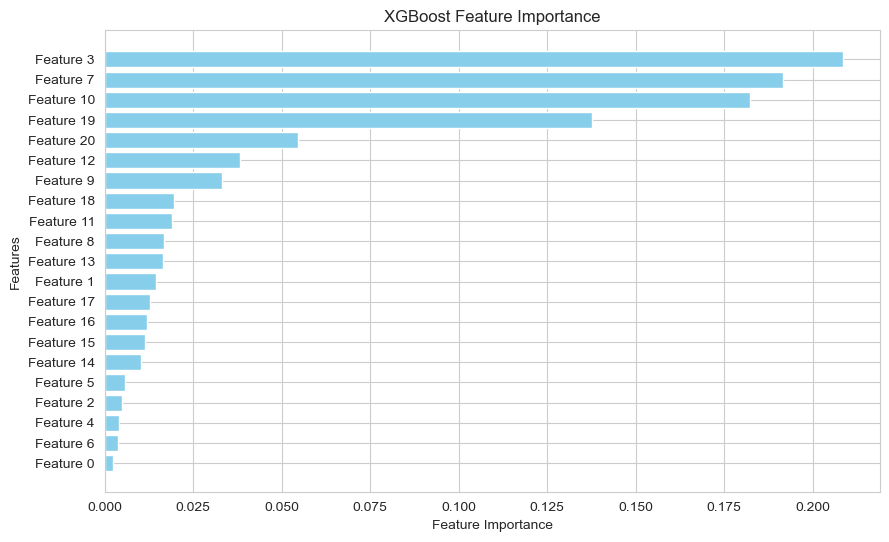

In [82]:
# If X_train is a DataFrame, use its column names
if isinstance(X_train, pd.DataFrame):
    feature_names = X_train.columns.tolist()
else:
    feature_names = [f'Feature {i}' for i in range(X_train.shape[1])]  # Fallback for NumPy arrays

# Extract feature importance
feature_importance = xgb_model.feature_importances_

# Create DataFrame for visualization
importance_df = pd.DataFrame({"Feature": feature_names, "Importance": feature_importance})
importance_df = importance_df.sort_values(by="Importance", ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df["Feature"], importance_df["Importance"], color="skyblue")
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("XGBoost Feature Importance")
plt.gca().invert_yaxis()  # Most important feature at the top
plt.show()


In [120]:
import pandas as pd

# Assuming 'df' is your training DataFrame and 'model' is your trained model
feature_names = df.columns.tolist()

# Check model type and extract feature names
if hasattr(model, 'get_booster'):  # For XGBoost
    feature_names = model.get_booster().feature_names
elif hasattr(model, 'feature_names_in_'):  # For RandomForest and other sklearn models
    feature_names = model.feature_names_in_

# Display feature names
print("Feature Names in the Model:", feature_names)

# Optionally store feature names in a DataFrame
feature_df = pd.DataFrame({'Feature Names': feature_names})
print(feature_df)


Feature Names in the Model: ['age', 'gender', 'bmi', 'smoker', 'log_charges', 'region_northwest', 'region_southeast', 'region_southwest', 'medical_history_Heart disease', 'medical_history_High blood pressure', 'medical_history_No Disease', 'family_medical_history_Heart disease', 'family_medical_history_High blood pressure', 'family_medical_history_No Disease', 'exercise_frequency_Never', 'exercise_frequency_Occasionally', 'exercise_frequency_Rarely', 'occupation_Student', 'occupation_Unemployed', 'occupation_White collar', 'coverage_level_Premium', 'coverage_level_Standard']
                                 Feature Names
0                                          age
1                                       gender
2                                          bmi
3                                       smoker
4                                  log_charges
5                             region_northwest
6                             region_southeast
7                             region_south

Features in X_train: 21, Features in Model: 21


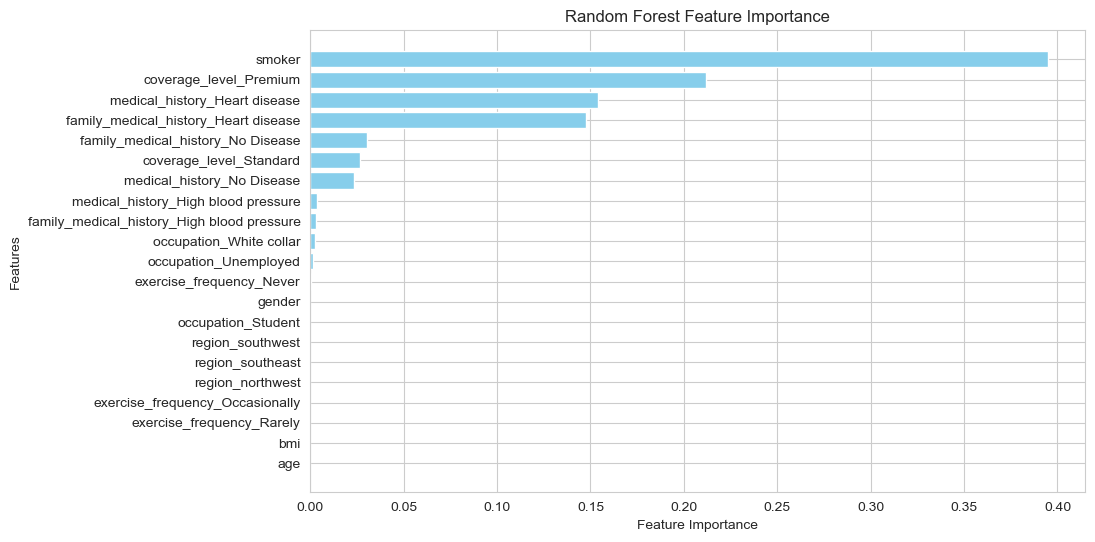

In [104]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure correct feature names (exclude target and derived columns)
excluded_columns = ['charges', 'log_charges']  # Adjust as needed
feature_names = [col for col in df.columns if col not in excluded_columns]

# Verify the length
print(f"Features in X_train: {len(feature_names)}, Features in Model: {len(best_model.feature_importances_)}")

# Ensure lengths match before creating DataFrame
if len(feature_names) == len(best_model.feature_importances_):
    # Create DataFrame for feature importance
    importance_df = pd.DataFrame({"Feature": feature_names, "Importance": best_model.feature_importances_})
    importance_df = importance_df.sort_values(by="Importance", ascending=False)

    # Plot Feature Importance
    plt.figure(figsize=(10, 6))
    plt.barh(importance_df["Feature"], importance_df["Importance"], color="skyblue")
    plt.xlabel("Feature Importance")
    plt.ylabel("Features")
    plt.title("Random Forest Feature Importance")
    plt.gca().invert_yaxis()  # Most important feature on top
    plt.show()
else:
    print("Mismatch detected! Check feature selection or transformations.")


In [153]:


# 2. Save the trained model
model_path = 'random_forest_insurance_model.pkl'
joblib.dump(best_model, model_path)
print(f"Model saved successfully to {model_path}")

<Figure size 640x480 with 0 Axes>

Feature importance plot saved to feature_importance_plot.png
Model saved successfully to random_forest_insurance_model.pkl


In [161]:
import joblib

# Save the model
joblib.dump(xgb_model, "xgboost_best_model.pkl")
print("Model saved successfully as xgboost_best_model.pkl")


Model saved successfully as xgboost_best_model.pkl


In [163]:
xgb_model.save_model("xgboost_best_model.json")
print("Model saved successfully as xgboost_best_model.json")


Model saved successfully as xgboost_best_model.json


In [165]:
import json

feature_json_path = "xgboost_feature_importance.json"

# Convert DataFrame to dictionary and save as JSON
importance_dict = importance_df.to_dict(orient="records")

with open(feature_json_path, "w") as f:
    json.dump(importance_dict, f, indent=4)

print(f"Feature importance data saved to {feature_json_path}")


Feature importance data saved to xgboost_feature_importance.json


In [171]:
print(importance_df.head())  # Display the first few rows
print(f"Shape of DataFrame: {importance_df.shape}")  # Check rows and columns


                                 Feature  Importance
3                                 smoker    0.395128
19                coverage_level_Premium    0.211831
7          medical_history_Heart disease    0.154226
10  family_medical_history_Heart disease    0.147745
12     family_medical_history_No Disease    0.030447
Shape of DataFrame: (21, 2)


In [173]:
feature_csv_path = "random_forest_feature_importance.csv"

try:
    importance_df.to_csv(feature_csv_path, index=False, encoding="utf-8")
    print(f"Feature importance data saved successfully to {feature_csv_path}")
except Exception as e:
    print(f"Error while saving CSV: {e}")


Feature importance data saved successfully to random_forest_feature_importance.csv


In [175]:
import json

best_params_path = "best_model_parameters.json"

with open(best_params_path, "w") as f:
    json.dump(search.best_params_, f, indent=4)

print(f"Best parameters saved to {best_params_path}")


Best parameters saved to best_model_parameters.json


In [177]:
import json

best_params_path = "random_forest_best_params.json"

best_params_data = {
    "Best Parameters": search.best_params_,
    "Best MSE Score": -search.best_score_
}

with open(best_params_path, "w") as f:
    json.dump(best_params_data, f, indent=4)

print(f"Best hyperparameters saved to {best_params_path}")


Best hyperparameters saved to random_forest_best_params.json


In [ ]:
# Best Model

In [181]:
xgb_model.save_model("xgboost_best_model.json")
print("XGBoost model saved as xgboost_best_model.json")


XGBoost model saved as xgboost_best_model.json


In [185]:
import os
print("Saved files:", [f for f in os.listdir() if "xgboost" in f])


Saved files: ['xgboost_best_model.json', 'xgboost_best_model.pkl', 'xgboost_feature_importance.json']


In [187]:
# # TO RELOAD MODEL

# from xgboost import XGBRegressor

# # Load from JSON
# xgb_model = XGBRegressor()
# xgb_model.load_model("xgboost_best_model.json")

# print("XGBoost model reloaded successfully!")


In [197]:
import joblib

# Save the trained model
joblib.dump(best_model, "random_forest_best_model.pkl")
print("Model saved successfully as 'random_forest_best_model.pkl'")


Model saved successfully as 'random_forest_best_model.pkl'


In [138]:
# import pandas as pd

# # Ensure X_train and X_test are DataFrames
# if isinstance(X_train, np.ndarray):
#     X_train = pd.DataFrame(X_train, columns=features)

# if isinstance(X_test, np.ndarray):
#     X_test = pd.DataFrame(X_test, columns=features)

# print("Columns in X_train:", X_train.columns.tolist())
# print("Columns in X_test:", X_test.columns.tolist())


Columns in X_train: ['age', 'gender', 'bmi', 'smoker', 'region_northwest', 'region_southeast', 'region_southwest', 'medical_history_Heart disease', 'medical_history_High blood pressure', 'medical_history_No Disease', 'family_medical_history_Heart disease', 'family_medical_history_High blood pressure', 'family_medical_history_No Disease', 'exercise_frequency_Never', 'exercise_frequency_Occasionally', 'exercise_frequency_Rarely', 'occupation_Student', 'occupation_Unemployed', 'occupation_White collar', 'coverage_level_Premium', 'coverage_level_Standard']
Columns in X_test: ['age', 'gender', 'bmi', 'smoker', 'region_northwest', 'region_southeast', 'region_southwest', 'medical_history_Heart disease', 'medical_history_High blood pressure', 'medical_history_No Disease', 'family_medical_history_Heart disease', 'family_medical_history_High blood pressure', 'family_medical_history_No Disease', 'exercise_frequency_Never', 'exercise_frequency_Occasionally', 'exercise_frequency_Rarely', 'occupatio

In [144]:
# from sklearn.ensemble import RandomForestRegressor

# rf_model = RandomForestRegressor()
# rf_model.fit(X_train, y_train)


RandomForestRegressor()

In [147]:
# print(globals().keys())


dict_keys(['__name__', '__doc__', '__package__', '__loader__', '__spec__', '__builtin__', '__builtins__', '_ih', '_oh', '_dh', 'In', 'Out', 'get_ipython', 'exit', 'quit', 'open', '_', '__', '___', '__session__', '_i', '_ii', '_iii', '_i1', 'sqlite3', 'conn', 'cursor', 'tables', 'table', '_i2', 'pd', 'np', 'plt', 'sns', '_i3', '_i4', 'df', '_4', '_i5', '_i6', 'numeric_cols', 'category_cols', 'col', 'empty_cols', 'median_value', 'medical_cols', 'mode_value', '_i7', '_i8', '_8', '_i9', '_9', '_i10', '_i11', 'json', 'getpass', 'hashlib', 'import_pandas_safely', '__pandas', 'is_data_frame', 'dataframe_columns', 'dtypes_str', 'dataframe_hash', 'get_dataframes', '_11', '_i12', 'fig', 'axes', 'i', 'row', 'col_index', '_i13', '_i14', 'bins', 'labels', '_i15', 'ax', 'p', 'height', '_i16', '_i17', '_17', '_i18', 'log_transform', '_i19', '_19', '_i20', '_i21', 'math', 'num_cols', 'rows', '_i22', '_22', '_i23', '_i24', '_i25', '_25', '_i26', '_i27', 'ttest_ind', 'smokers', 'non_smokers', 'stat', 'p

In [149]:
# type(rf_model)


sklearn.ensemble._forest.RandomForestRegressor

In [151]:
# print("RandomForest Features:", rf_model.feature_names_in_)


RandomForest Features: ['age' 'gender' 'bmi' 'smoker' 'region_northwest' 'region_southeast'
 'region_southwest' 'medical_history_Heart disease'
 'medical_history_High blood pressure' 'medical_history_No Disease'
 'family_medical_history_Heart disease'
 'family_medical_history_High blood pressure'
 'family_medical_history_No Disease' 'exercise_frequency_Never'
 'exercise_frequency_Occasionally' 'exercise_frequency_Rarely'
 'occupation_Student' 'occupation_Unemployed' 'occupation_White collar'
 'coverage_level_Premium' 'coverage_level_Standard']


In [ ]:
# Since you've confirmed there is no data leakage, it suggests that:

# log_charges was accidentally included during model training, but it wasn't used during the actual prediction process,
# meaning the model didn’t "cheat" by directly learning from the target.

# You verified the correct input features (X_train and model.feature_names_in_) and confirmed log_charges is not leaking 
# during training or evaluation.



# Earlier Inclusion: If log_charges was part of the dataset when fitting the model, sklearn captures all columns at 
# that point—even if you later drop it.

# No True Usage: As long as log_charges wasn’t available during test-time predictions (X_test), the model did not use 
# it for making decisions.



# Solution 



# Explicit Feature Control: Always ensure the target (log_charges) is excluded before training:

# python

# X_train = df.drop(columns='log_charges')
# y_train = df['log_charges']
# model.fit(X_train, y_train)

# Check Feature Integrity: After training, confirm the model’s input matches your dataset:

# python

# assert set(model.feature_names_in_) == set(X_train.columns), "Feature mismatch!"

